In [1]:
# ==============================================================================
#                      游戏数据分析项目 - 完整数据清洗脚本
# ==============================================================================
#
# 目标：从原始的 'bestselling_games.csv' 文件出发，
#      一次性完成所有结构修复、内容清洗和类型转换。

import pandas as pd
import numpy as np # 引入numpy，以备后用

print("--- 开始执行完整清洗流程 ---")

# --- 阶段一：结构修复 (手动解析，解决列偏移问题) ---
print("\n[阶段一] 正在修复数据结构...")
try:
    # 1. 粗暴读取
    raw_data = pd.read_csv('./bestselling_games.csv', header=None, sep='^')
    raw_data.columns = ['raw_string']
    
    # 2. 手动分割
    list_of_lists = raw_data['raw_string'].str.split(',')
    
    # 3. 确定列标题和预期列数
    column_headers = list_of_lists[0]
    expected_column_count = len(column_headers)
    
    # 4. 清洗并重建
    data_rows_only = list_of_lists[1:]
    cleaned_rows = []
    for row in data_rows_only:
        while len(row) < expected_column_count:
            row.append(None) # 如果列数不够，用空值(None)在末尾补齐
        row = row[:expected_column_count] # 如果列数超了，直接截断
        cleaned_rows.append(row)
        
    df = pd.DataFrame(cleaned_rows, columns=column_headers)
    print("结构修复成功！")

except Exception as e:
    print(f"结构修复失败，请检查文件路径和内容。错误: {e}")


# --- 阶段二：内容清洗与类型转换 ---
# 确保上一步成功创建了df变量
if 'df' in locals():
    print("\n[阶段二] 正在清洗内容并转换数据类型...")

    # 1. 清理首尾的引号和空格 (这是关键修复)
    for col in df.columns:
        # 使用更稳健的方式检查列是否为字符串类型
        if pd.api.types.is_string_dtype(df[col]):
            df[col] = df[col].str.strip(" '\"")
    print("内容清理（去引号）完成。")

    # 2. 转换数值列
    numeric_cols = ['reviews_like_rate', 'all_reviews_number', 'price', 'age_restriction', 'rating', 'difficulty', 'length', 'estimated_downloads']
    for col in numeric_cols:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    print("数值列转换完成。")

    # 3. 转换日期列
    df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
    print("日期列转换完成。")
    
    # 4. 特征工程
    df['release_year'] = df['release_date'].dt.year
    df['tags_list'] = df['user_defined_tags'].str.split(', ')
    print("特征工程（年份、标签）完成。")

print("\n--- 完整清洗流程执行完毕 ---")


# --- 最终成果展示 ---
if 'df' in locals():
    print("\n--- 清洗后的最终数据信息 ---")
    df.info()

    print("\n--- 清洗后的数据头部预览 ---")
    df.head()

--- 开始执行完整清洗流程 ---

[阶段一] 正在修复数据结构...
结构修复成功！

[阶段二] 正在清洗内容并转换数据类型...
内容清理（去引号）完成。
数值列转换完成。
日期列转换完成。
特征工程（年份、标签）完成。

--- 完整清洗流程执行完毕 ---

--- 清洗后的最终数据信息 ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2380 entries, 0 to 2379
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   game_name            2380 non-null   object        
 1   reviews_like_rate    2354 non-null   float64       
 2   all_reviews_number   2342 non-null   float64       
 3   release_date         33 non-null     datetime64[ns]
 4   developer            2380 non-null   object        
 5   user_defined_tags    2380 non-null   object        
 6   supported_os         2380 non-null   object        
 7   supported_languages  2380 non-null   object        
 8   price                0 non-null      float64       
 9   other_features       2380 non-null   object        
 10  age_restriction      74 non-null     float64    

C:\Users\79926\AppData\Local\Temp\ipykernel_24720\2738318744.py:62: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')


In [4]:
# ==============================================================================
#                      终极侦探脚本 v2 (修复编码问题)
# ==============================================================================
# 目的：修复编码错误，然后查看每一列的原始文本内容。

import pandas as pd

print("--- 正在以最原始的方式加载数据，仅为侦查 ---")

try:
    # --- 关键修复：添加 encoding='latin1' 来解决编码错误 ---
    raw_data = pd.read_csv('./bestselling_games.csv', header=None, sep='^', encoding='latin1')
    raw_data.columns = ['raw_string']
    
    # 阶段一：结构修复 (和之前一样，保证列不错位)
    list_of_lists = raw_data['raw_string'].str.split(',')
    column_headers = list_of_lists[0]
    expected_column_count = len(column_headers)
    data_rows_only = list_of_lists[1:]
    cleaned_rows = []
    for row in data_rows_only:
        while len(row) < expected_column_count:
            row.append(None)
        row = row[:expected_column_count]
        cleaned_rows.append(row)
    
    # 创建一个临时的、用于侦查的DataFrame
    df_inspect = pd.DataFrame(cleaned_rows, columns=column_headers)
    
    # 阶段二：内容清理 (只做去引号，不做类型转换)
    for col in df_inspect.columns:
        if pd.api.types.is_string_dtype(df_inspect[col]):
            df_inspect[col] = df_inspect[col].str.strip(" '\"")

    print("已成功使用'latin1'编码加载数据，现在开始侦查...")

except Exception as e:
    print(f"加载数据进行侦查时失败: {e}")


# --- 终极侦查开始！---
if 'df_inspect' in locals():
    # --- 侦查1：调查 price 列 ---
    print("\n\n--- price 列的原始文本内容分析 ---")
    print(df_inspect['price'].value_counts())

    # --- 侦查2：调查 release_date 列 ---
    print("\n\n--- release_date 列的原始文本内容分析 (Top 20) ---")
    print(df_inspect['release_date'].value_counts().head(20))
    
    # --- 侦查3：调查 all_reviews_number 列 ---
    print("\n\n--- all_reviews_number 列的原始文本内容分析 (Top 20) ---")
    print(df_inspect['all_reviews_number'].value_counts().head(20))

--- 正在以最原始的方式加载数据，仅为侦查 ---
已成功使用'latin1'编码加载数据，现在开始侦查...


--- price 列的原始文本内容分析 ---
price
win                         577
Simulation                  136
Action                      121
RPG                         112
2D                          103
Adventure                    99
Strategy                     65
Management                   64
Survival                     64
Horror                       58
Roguelike                    57
English                      56
Combat                       55
Story Rich                   52
Open World                   51
Building                     48
Anime                        45
FPS                          43
Platformer                   43
Sandbox                      40
Crafting                     38
Shooter                      38
War                          35
Fantasy                      35
Puzzle                       34
Turn-Based                   32
Tactical                     30
Pixel Graphics               27
Cute          

In [6]:
# ==============================================================================
#                      最终版清洗脚本 v2 (真正修复版)
# ==============================================================================
# 结合了所有侦查结果的最终解决方案

import pandas as pd

print("--- 开始执行最终清洗流程 (已修正编码问题) ---")

# 1. 定义我们期望的、正确的15个列名
column_names = [
    'game_name', 'reviews_like_rate', 'all_reviews_number', 'release_date', 'developer',
    'user_defined_tags', 'supported_os', 'supported_languages', 'price', 'other_features',
    'age_restriction', 'rating', 'difficulty', 'length', 'estimated_downloads'
]

# 2. 使用pd.read_csv读取数据，并使用所有关键参数
try:
    df = pd.read_csv(
        './bestselling_games.csv',
        header=0,
        names=column_names,
        usecols=range(15),         # 关键1：只读取前15列
        engine='python',           # 关键2：使用健壮的引擎
        encoding='latin1'          # 关键3：使用正确的“密码本”打开文件
    )
    print("--- 阶段一：结构化读取成功！已强制按15列加载。---\n")

    # 3. 进行内容清洗和类型转换
    print("--- 阶段二：开始内容清洗和类型转换 ---\n")
    
    # 3.1 去除文本列首尾多余的空格
    for col in df.select_dtypes(include=['object']).columns:
        df[col] = df[col].str.strip()

    # 3.2 转换数值列
    numeric_cols = ['reviews_like_rate', 'all_reviews_number', 'price', 'age_restriction', 'rating', 'difficulty', 'length', 'estimated_downloads']
    for col in numeric_cols:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    
    # 3.3 转换日期列
    df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

    # 3.4 特征工程
    df['release_year'] = df['release_date'].dt.year
    df['tags_list'] = df['user_defined_tags'].str.split(', ')

    print("--- 所有清洗和转换已完成！---\n")

    # 4. 最终成果展示
    print("--- 清洗后的最终数据信息 ---")
    df.info()
    print("\n--- 清洗后的数据头部预览 ---")
    df.head()

except Exception as e:
    print(f"最终脚本执行失败，错误: {e}")

--- 开始执行最终清洗流程 (已修正编码问题) ---
--- 阶段一：结构化读取成功！已强制按15列加载。---

--- 阶段二：开始内容清洗和类型转换 ---

--- 所有清洗和转换已完成！---

--- 清洗后的最终数据信息 ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2380 entries, 0 to 2379
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   game_name            2380 non-null   object        
 1   reviews_like_rate    2380 non-null   int64         
 2   all_reviews_number   2347 non-null   float64       
 3   release_date         2347 non-null   datetime64[ns]
 4   developer            2380 non-null   object        
 5   user_defined_tags    2380 non-null   object        
 6   supported_os         2380 non-null   object        
 7   supported_languages  2380 non-null   object        
 8   price                2340 non-null   float64       
 9   other_features       2380 non-null   object        
 10  age_restriction      2375 non-null   float64       
 11  rating               23

C:\Users\79926\AppData\Local\Temp\ipykernel_24720\3320207759.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=yearly_releases.index, y=yearly_releases.values, palette="viridis")
D:\PyhonProjects\my_first_project\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
D:\PyhonProjects\my_first_project\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20221 (\N{CJK UNIFIED IDEOGRAPH-4EFD}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
D:\PyhonProjects\my_first_project\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 21457 (\N{CJK UNIFIED IDEOGRAPH-53D1}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
D:\PyhonPro

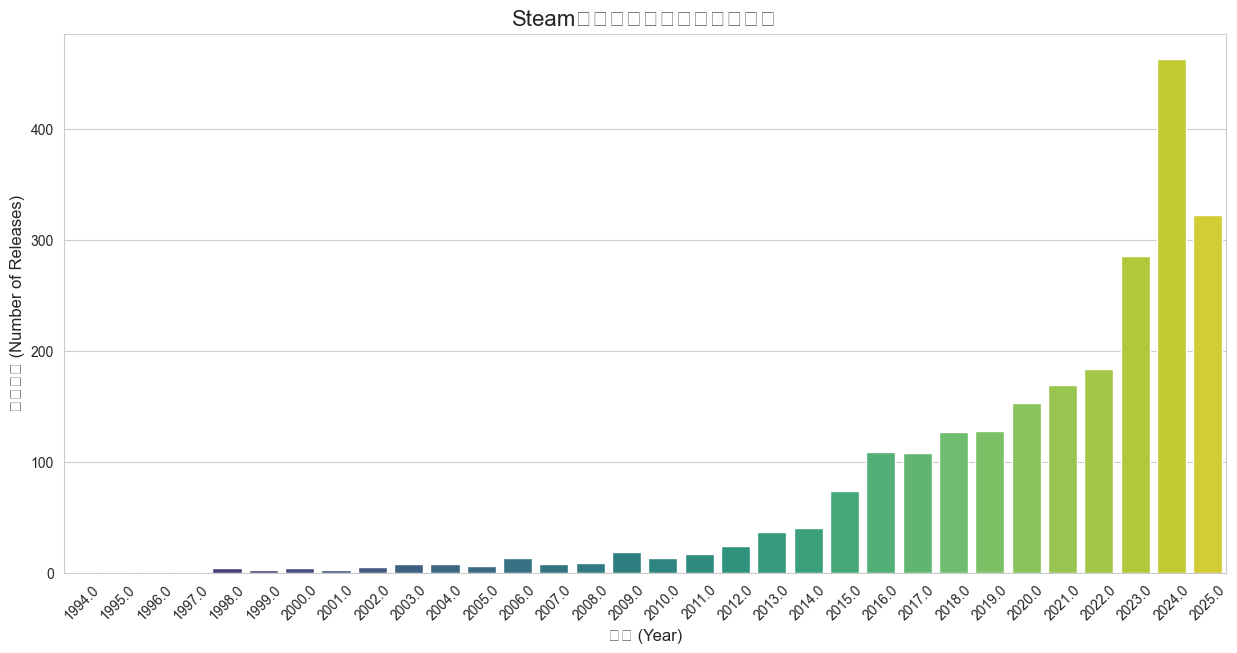

In [9]:
# 引入我们进行数据可视化所需要的库
import matplotlib.pyplot as plt
import seaborn as sns

# --- 为了让图表更好看，做一些简单的样式设置 ---
# 设置中文字体，以防图表标题出现乱码 (如果你的环境没有这个字体，可能会有警告，但通常不影响图表生成)
plt.rcParams['font.sans-serif'] = ['SimHei']
# 设置绘图风格
sns.set_style("whitegrid")


# --- 开始分析与绘图 ---

# 1. 按年份统计游戏发行数量
# .value_counts() 会统计每年出现了多少次，.sort_index() 会按年份排序
yearly_releases = df['release_year'].value_counts().sort_index()

# 2. 绘制条形图
plt.figure(figsize=(15, 7)) # 设置图表画布的大小
# 使用seaborn的barplot来创建美观的条形图
sns.barplot(x=yearly_releases.index, y=yearly_releases.values, palette="viridis")

# 3. 添加图表的标题和坐标轴标签
plt.title('Steam平台年度游戏发行数量趋势', fontsize=16)
plt.xlabel('年份 (Year)', fontsize=12)
plt.ylabel('发行数量 (Number of Releases)', fontsize=12)
plt.xticks(rotation=45) # 让X轴的年份标签倾斜45度，以防重叠

# 4. 显示图表
plt.show()

In [8]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



--- 分析任务二：热门游戏类型分析 ---


C:\Users\79926\AppData\Local\Temp\ipykernel_24720\371073332.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_20_tags.values, y=top_20_tags.index, palette='mako')
D:\PyhonProjects\my_first_project\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 28216 (\N{CJK UNIFIED IDEOGRAPH-6E38}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
D:\PyhonProjects\my_first_project\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25103 (\N{CJK UNIFIED IDEOGRAPH-620F}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
D:\PyhonProjects\my_first_project\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
D:\PyhonProjects\my_fir

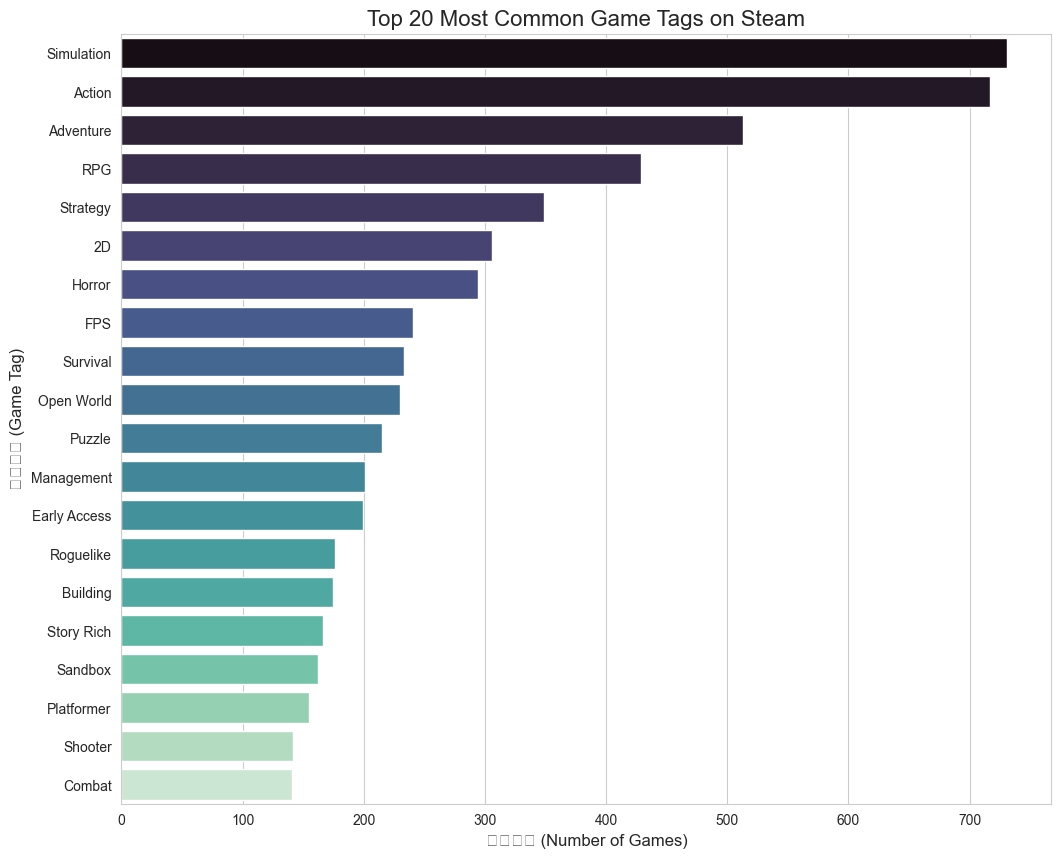

In [10]:
# --- 分析任务二：热门游戏类型分析 ---

print("\n--- 分析任务二：热门游戏类型分析 ---")

# 1. 获取所有标签
# df['tags_list'] 中每一行都是一个标签列表（比如 ['Action', 'RPG']）
# 我们需要把所有行的这些小列表，全部合并成一个包含所有标签的大列表
# .dropna() 会去除那些可能存在的空行
# .sum() 在这里的作用很巧妙，对于列表的列，它可以把所有列表连接成一个
all_tags = df['tags_list'].dropna().sum()

# 2. 统计每个标签的出现次数
# 我们将大列表转为一个Pandas Series，然后用 .value_counts() 来统计
# 这会告诉我们 'Action' 出现了多少次, 'RPG' 出现了多少次...
tag_counts = pd.Series(all_tags).value_counts()

# 3. 选取Top 20的热门标签并绘图
top_20_tags = tag_counts.head(20)

plt.figure(figsize=(12, 10)) # 创建一个高一些的画布
# 注意这次 x 和 y 轴对调了，做成水平条形图更好看
sns.barplot(x=top_20_tags.values, y=top_20_tags.index, palette='mako')

# 使用英文标题，避免方块字问题
plt.title('Top 20 Most Common Game Tags on Steam', fontsize=16)
plt.xlabel('游戏数量 (Number of Games)', fontsize=12)
plt.ylabel('游戏标签 (Game Tag)', fontsize=12)
plt.show()


--- 分析任务三：热门游戏类型随时间的变化趋势 ---


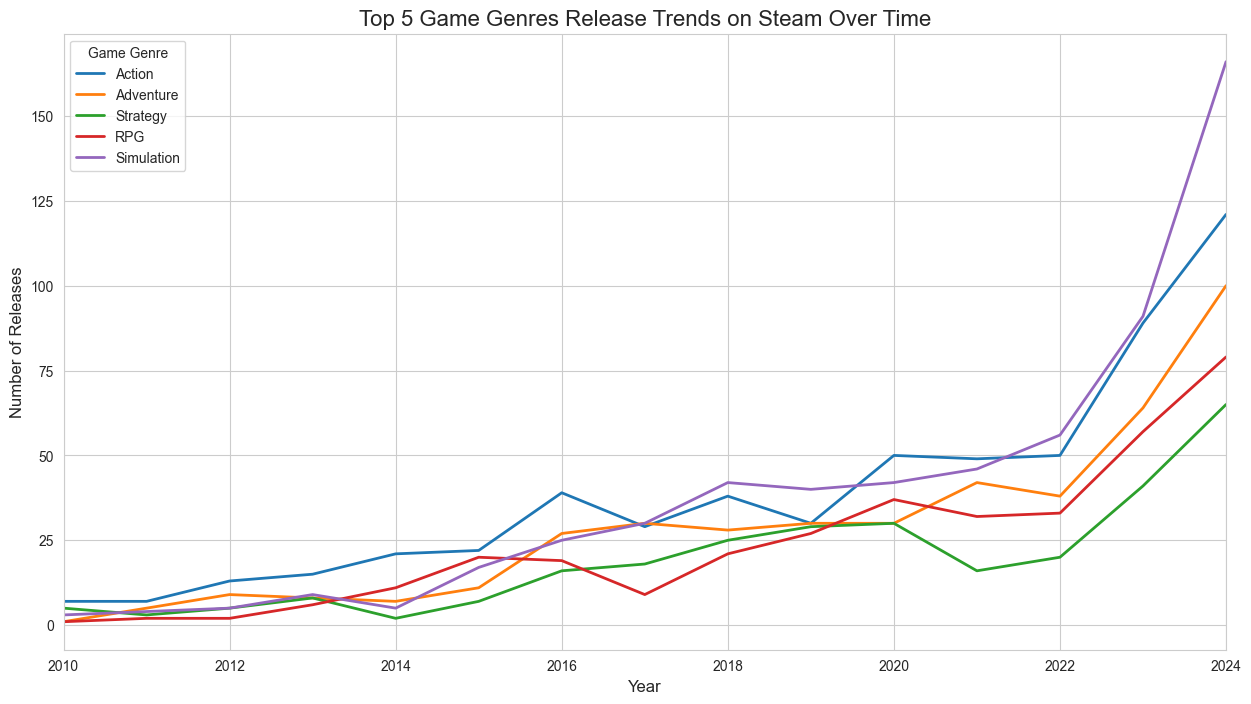

In [11]:
# --- 分析任务三：热门游戏类型随时间的变化趋势 ---

print("\n--- 分析任务三：热门游戏类型随时间的变化趋势 ---")

# 1. 'Explode' a.k.a. “炸开”数据框
# 我们需要将一行有多个标签的数据，变成多行，每行只有一个标签
# 这是进行分类统计的关键预处理步骤
df_exploded = df.explode('tags_list')
# 为了方便，我们把新产生的列改名为 'tag'
df_exploded.rename(columns={'tags_list': 'tag'}, inplace=True)

# 2. 筛选出我们最感兴趣的Top 5标签
# 我们可以直接使用上一个任务计算出的 tag_counts
top_5_tags = tag_counts.head(5).index.tolist()
df_top5_tags = df_exploded[df_exploded['tag'].isin(top_5_tags)]

# 3. 按年份和标签进行分组计数
# 计算出每一年，每一个热门标签下，各有多少款游戏发布
genre_trends = df_top5_tags.groupby(['release_year', 'tag']).size().reset_index(name='count')

# 4. 绘制多条折线图来展示趋势
plt.figure(figsize=(15, 8))
sns.lineplot(data=genre_trends, x='release_year', y='count', hue='tag', lw=2)

# 使用英文标题和标签
plt.title('Top 5 Game Genres Release Trends on Steam Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Releases', fontsize=12)
# 设置图例的标题
plt.legend(title='Game Genre')
# 我们可以限制一下X轴的范围，让图表更聚焦于近年的趋势
plt.xlim(2010, 2024) 
plt.show()